In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
credits = pd.read_csv(r"C:\Users\patri\Downloads\tmdb_5000_credits.csv\tmdb_5000_credits.csv")
movies = pd.read_csv(r"C:\Users\patri\Downloads\tmdb_5000_movies.csv\tmdb_5000_movies.csv")

credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


In [7]:
#merge data sets

credits.columns = ['id','title','cast','crew']
movies = movies.merge(credits, on="id")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies.shape

(4803, 23)

In [9]:
movies_cleaned = movies.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'spoken_languages'])
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#change columns in json format to string

# Changing 'genres' column from json to string
movies_cleaned['genres'] = movies_cleaned['genres'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['genres']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the genre
    movies_cleaned.loc[index, 'genres'] = str(l1)
    
# Changing 'keywords' column from json to string
movies_cleaned['keywords'] = movies_cleaned['keywords'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['keywords']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'keywords'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_companies'] = movies_cleaned['production_companies'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_companies']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_companies'] = str(l1)
    
# Changing 'production_companies' column from json to string
movies_cleaned['production_countries'] = movies_cleaned['production_countries'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['production_countries']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'production_countries'] = str(l1)
    
# Changing 'cast' column from json to string
movies_cleaned['cast'] = movies_cleaned['cast'].apply(json.loads)
for index,i in zip(movies_cleaned.index, movies_cleaned['cast']):
    l1 = []
    for j in range(len(i)):
        l1.append((i[j]['name']))     # "name" contains => name of the keyword
    movies_cleaned.loc[index, 'cast'] = str(l1)


movies_cleaned['crew']=movies_cleaned['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
movies_cleaned['crew']=movies_cleaned['crew'].apply(director)
movies_cleaned.rename(columns={'crew':'director'},inplace=True)

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [11]:
#clean up the columns now strings

movies_cleaned['genres']=movies_cleaned['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['genres']=movies_cleaned['genres'].str.split(',')

movies_cleaned['keywords']=movies_cleaned['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['keywords']=movies_cleaned['keywords'].str.split(',')

movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_companies']=movies_cleaned['production_companies'].str.split(',')

movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['production_countries']=movies_cleaned['production_countries'].str.split(',')

movies_cleaned['cast']=movies_cleaned['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_cleaned['cast']=movies_cleaned['cast'].str.split(',')

movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton


In [12]:
movies_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [13]:
v = movies_cleaned['vote_count']
R = movies_cleaned['vote_average']
C = movies_cleaned['vote_average'].mean()
m = movies_cleaned['vote_count'].quantile(0.70)    # Movies > 70th percentile votes

In [14]:
movies_cleaned['weighted_avg'] = ((R*v)+(C*m))/(v+m)
movies_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.148013
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.807627
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.276075
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.509565
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.098319


In [15]:
sorted_ranking = movies_cleaned.sort_values('weighted_avg', ascending=False)
sorted_ranking

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
1881,25000000,"[Drama, Crime]",278,"[prison, corruption, policebrutality, prisonce...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,[CastleRockEntertainment],[UnitedStatesofAmerica],1994-09-23,28341469,142.0,Fear can hold you prisoner. Hope can set you f...,8.5,8205,"[TimRobbins, MorganFreeman, BobGunton, ClancyB...",Frank Darabont,8.340775
3337,6000000,"[Drama, Crime]",238,"[italy, loveatfirstsight, lossoffather, patria...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[ParamountPictures, AlfranProductions]",[UnitedStatesofAmerica],1972-03-14,245066411,175.0,An offer you can't refuse.,8.4,5893,"[MarlonBrando, AlPacino, JamesCaan, RichardS.C...",Francis Ford Coppola,8.192887
662,63000000,[Drama],550,"[supportgroup, dualidentity, nihilism, rageand...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[RegencyEnterprises, Fox2000Pictures, TaurusFi...","[Germany, UnitedStatesofAmerica]",1999-10-15,100853753,139.0,Mischief. Mayhem. Soap.,8.3,9413,"[EdwardNorton, BradPitt, MeatLoaf, JaredLeto, ...",David Fincher,8.171648
3232,8000000,"[Thriller, Crime]",680,"[transporter, brothel, drugdealer, boxer, mass...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[MiramaxFilms, ABandApart, JerseyFilms]",[UnitedStatesofAmerica],1994-10-08,213928762,154.0,Just because you are a character doesn't mean ...,8.3,8428,"[JohnTravolta, SamuelL.Jackson, UmaThurman, Br...",Quentin Tarantino,8.157615
65,185000000,"[Drama, Action, Crime, Thriller]",155,"[dccomics, crimefighter, secretidentity, scare...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[DCComics, LegendaryPictures, WarnerBros., DCE...","[UnitedKingdom, UnitedStatesofAmerica]",2008-07-16,1004558444,152.0,Why So Serious?,8.2,12002,"[ChristianBale, HeathLedger, AaronEckhart, Mic...",Christopher Nolan,8.102674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,100000000,"[Action, Crime]",314,"[whiterussian, sex, dccomics, beauty, sexism, ...",en,Catwoman,Liquidated after discovering a corporate consp...,32.271938,"[VillageRoadshowPictures, DiNoviPictures, Warn...",[UnitedStatesofAmerica],2004-07-22,82102379,104.0,CATch her in IMAX,4.2,808,"[HalleBerry, BenjaminBratt, SharonStone, Lambe...",Pitof,4.991470
3746,4000000,[Thriller],241251,"[malenudity, femalenudity, sex, adultery, infi...",en,The Boy Next Door,A recently cheated on married woman falls for ...,24.161735,"[UniversalPictures, NuyoricanProductions, Blum...",[UnitedStatesofAmerica],2015-01-23,52425855,91.0,A Moment She Couldn't Resist. An Obsession He ...,4.1,1022,"[JenniferLopez, RyanGuzman, IanNelson, JohnCor...",Rob Cohen,4.822053
210,125000000,"[Action, Crime, Fantasy]",415,"[doublelife, dccomics, dualidentity, crimefigh...",en,Batman & Robin,Along with crime-fighting partner Robin and ne...,50.073575,"[PolyGramFilmedEntertainment, WarnerBros.]","[UnitedKingdom, UnitedStatesofAmerica]",1997-06-20,238207122,125.0,Strength. Courage. Honor. And loyalty.,4.2,1418,"[GeorgeClooney, ""ChrisODonnell"", ArnoldSchwarz...",Joel Schumacher,4.749951
242,120000000,"[Action, Adventure, ScienceFiction]",166424,"[teleportation, transformation, telekinesis, p...",en,Fantastic Four,Four young outsiders teleport to a dangerous u...,38.126095,"[TwentiethCenturyFoxFilmCorporation, MarvFilms...",[UnitedStatesofAmerica],2015-08-05,167977596,100.0,Change is coming.,4.4,2278,"[MilesTeller, KateMara, MichaelB.Jordan, Jamie...",Josh Trank,4.743880


In [16]:
sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_avg', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_avg,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


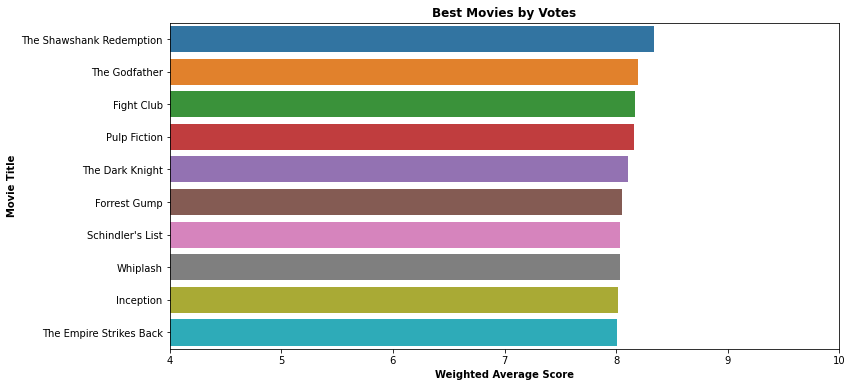

In [17]:
weight_avg = sorted_ranking.sort_values('weighted_avg', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = weight_avg['weighted_avg'].head(10), y=weight_avg['original_title'].head(10), data=weight_avg)
plt.xlim(4, 10)
plt.title("Best Movies by Votes", weight="bold")
plt.xlabel("Weighted Average Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [18]:
popularity = sorted_ranking.sort_values('popularity', ascending=False)
popularity.head(10)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg
546,74000000,"[Family, Animation, Adventure, Comedy]",211672,"[assistant, aftercreditsstinger, duringcredits...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[UniversalPictures, IlluminationEntertainment]",[UnitedStatesofAmerica],2015-06-17,1156730962,91.0,"Before Gru, they had a history of bad bosses",6.4,4571,"[SandraBullock, JonHamm, MichaelKeaton, Alliso...",Kyle Balda,6.365286
95,165000000,"[Adventure, Drama, ScienceFiction]",157336,"[savingtheworld, artificialintelligence, fathe...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[ParamountPictures, LegendaryPictures, WarnerB...","[Canada, UnitedStatesofAmerica, UnitedKingdom]",2014-11-05,675120017,169.0,Mankind was born on Earth. It was never meant ...,8.1,10867,"[MatthewMcConaughey, JessicaChastain, AnneHath...",Christopher Nolan,7.998100
788,58000000,"[Action, Adventure, Comedy]",293660,"[antihero, mercenary, marvelcomic, superhero, ...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[TwentiethCenturyFoxFilmCorporation, MarvelEnt...",[UnitedStatesofAmerica],2016-02-09,783112979,108.0,Witness the beginning of a happy ending,7.4,10995,"[RyanReynolds, MorenaBaccarin, EdSkrein, T.J.M...",Tim Miller,7.334360
94,170000000,"[Action, ScienceFiction, Adventure]",118340,"[marvelcomic, spaceship, space, outerspace, or...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[MarvelStudios, MovingPictureCompany(MPC), Bul...","[UnitedKingdom, UnitedStatesofAmerica]",2014-07-30,773328629,121.0,All heroes start somewhere.,7.9,9742,"[ChrisPratt, ZoeSaldana, DaveBautista, VinDies...",James Gunn,7.798252
127,150000000,"[Action, Adventure, ScienceFiction, Thriller]",76341,"[future, chase, post-apocalyptic, dystopia, au...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[VillageRoadshowPictures, KennedyMillerProduct...","[Australia, UnitedStatesofAmerica]",2015-05-13,378858340,120.0,What a Lovely Day.,7.2,9427,"[TomHardy, CharlizeTheron, NicholasHoult, Hugh...",George Miller,7.135687
28,150000000,"[Action, Adventure, ScienceFiction, Thriller]",135397,"[monster, dna, tyrannosaurusrex, velociraptor,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[UniversalStudios, AmblinEntertainment, Legend...",[UnitedStatesofAmerica],2015-06-09,1513528810,124.0,The park is open.,6.5,8662,"[ChrisPratt, BryceDallasHoward, IrrfanKhan, ""V...",Colin Trevorrow,6.474365
199,140000000,"[Adventure, Fantasy, Action]",22,"[exoticisland, blacksmith, eastindiatradingcom...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[WaltDisneyPictures, JerryBruckheimerFilms]",[UnitedStatesofAmerica],2003-07-09,655011224,143.0,Prepare to be blown out of the water.,7.5,6985,"[JohnnyDepp, GeoffreyRush, OrlandoBloom, Keira...",Gore Verbinski,7.391892
82,170000000,"[ScienceFiction, Action, Drama, Thriller]",119450,"[leader, colony, post-apocalyptic, dystopia, f...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"[IngeniousMedia, CherninEntertainment, TSGEnte...",[UnitedStatesofAmerica],2014-06-26,710644566,130.0,One last chance for peace.,7.3,4410,"[AndySerkis, JasonClarke, GaryOldman, KeriRuss...",Matt Reeves,7.159397
200,125000000,"[ScienceFiction, Adventure, Thriller]",131631,"[resistance, post-apocalyptic, dystopia, war, ...",en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,206.227151,"[Lionsgate, ColorForce]",[UnitedStatesofAmerica],2014-11-18,752100229,123.0,Fire burns brighter in the darkness,6.6,5584,"[JenniferLawrence, JoshHutcherson, LiamHemswor...",Francis Lawrenc

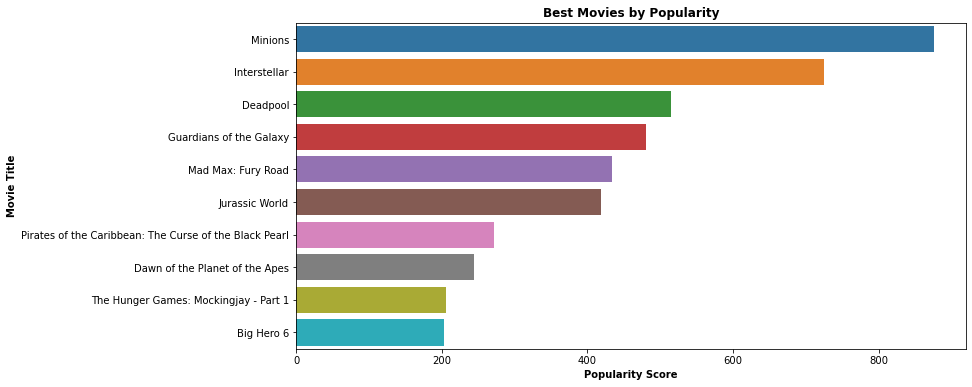

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)
plt.title("Best Movies by Popularity", weight="bold")
plt.xlabel("Popularity Score", weight="bold")
plt.ylabel("Movie Title", weight="bold")
plt.show()

In [20]:
# Scaling down the Popularity Score and Weighted Average due to difference in magnitude
scaling = MinMaxScaler()
movie_scaled = scaling.fit_transform(movies_cleaned[['weighted_avg', 'popularity']])
movie_normalized = pd.DataFrame(movie_scaled, columns=['weighted_avg', 'popularity'])
movie_normalized.head()

,weighted_avg,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [21]:
movies_cleaned[['normalized_weighted_avg', 'normalized_popularity']] = movie_normalized
movies_cleaned.head(20)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,tagline,vote_average,vote_count,cast,director,weighted_avg,normalized_weighted_avg,normalized_popularity
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[IngeniousFilmPartners, TwentiethCenturyFoxFil...","[UnitedStatesofAmerica, UnitedKingdom]",...,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",James Cameron,7.148013,0.674339,0.171815
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[WaltDisneyPictures, JerryBruckheimerFilms, Se...",[UnitedStatesofAmerica],...,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",Gore Verbinski,6.807627,0.581403,0.158846
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[ColumbiaPictures, Danjaq, B24]","[UnitedKingdom, UnitedStatesofAmerica]",...,880674609,148.0,A Plan No One Escapes,6.3,4466,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",Sam Mendes,6.276075,0.436273,0.122635
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[LegendaryPictures, WarnerBros., DCEntertainme...",[UnitedStatesofAmerica],...,1084939099,165.0,The Legend Ends,7.6,9106,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",Christopher Nolan,7.509565,0.773054,0.128272
4,260000000,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[WaltDisneyPictures],[UnitedStatesofAmerica],...,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",Andrew Stanton,6.098319,0.387739,0.050169
5,258000000,"[Fantasy, Action, Adventure]",559,"[dualidentity, amnesia, sandstorm, ""loveofones...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[ColumbiaPictures, LauraZiskinProductions, Mar...",[UnitedStatesofAmerica],...,890871626,139.0,The battle within.,5.9,3576,"[TobeyMaguire, KirstenDunst, JamesFranco, Thom...",Sam Raimi,5.926859,0.340926,0.132141
6,260000000,"[Animation, Family]",38757,"[hostage, magic, horse, fairytale, musical, pr...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[WaltDisneyPictures, WaltDisneyAnimationStudios]",[UnitedStatesofAmerica],...,591794936,100.0,They're taking adventure to new lengths.,7.4,3330,"[ZacharyLevi, MandyMoore, DonnaMurphy, RonPerl...",Byron Howard,7.205715,0.690093,0.055600
7,280000000,"[Action, Adventure, ScienceFiction]",99861,"[marvelcomic, sequel, superhero, basedoncomicb...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[MarvelStudios, PrimeFocus, RevolutionSunStudios]",[UnitedStatesofAmerica],...,1405403694,141.0,A New Age Has Come.,7.3,6767,"[RobertDowneyJr., ChrisHemsworth, MarkRuffalo,...",Joss Whedon,7.204498,0.689761,0.153360
8,250000000,"[Adventure, Fantasy, Family]",767,"[witch, magic, broom, schoolofwitchcraft, wiza...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[WarnerBros., HeydayFilms]","[UnitedKingdom, UnitedStatesofAmerica]",...,933959197,153.0,Dark Secrets Revealed,7.4,5293,"[DanielRadcliffe, RupertGrint, EmmaWatson, Tom...",David Yates,7.270642,0.707820,0.112937
9,250000000,"[Action, Adventure, Fantasy]",209112,"[dcco

In [22]:
movies_cleaned['score'] = movies_cleaned['normalized_weighted_avg'] * 0.5 + movies_cleaned['normalized_popularity'] * 0.5
movies_cleaned = movies_cleaned.sort_values(['score'], ascending=False)
movies_cleaned[['original_title','normalized_weighted_avg', 'normalized_popularity', 'score']].head(10)

,original_title,normalized_weighted_avg,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


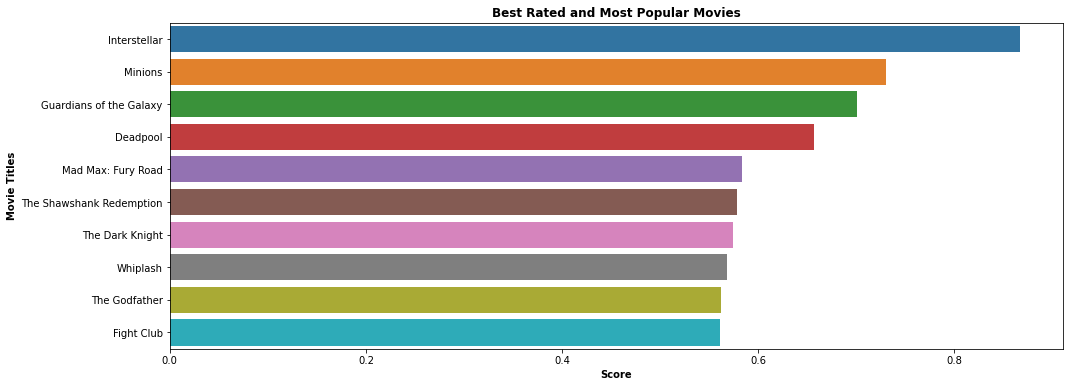

In [23]:
movies_score = movies_cleaned.sort_values('score', ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)
plt.title("Best Rated and Most Popular Movies", weight="bold")
plt.xlabel("Score", weight="bold")
plt.ylabel("Movie Titles", weight="bold")
plt.show()